In [2]:
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Lligues_europees_UEFA.csv', encoding="ISO-8859-1",sep=';')
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


1. Descripción de nuestras variables

|Variable|Descripción|
|--------|-----------|
|Rk|Ranking|
|Squad|Equipo|
|country| País|
|LgRk|Ranking en su liga (País)|
|MP |Partidos jugados|
|W|Partidos ganados|
| D|Partidos empatados|
|L |Partidos perdidos|
|GF|Goles a favor|
|GA|Goles en contra|
|GD|Diferencia de goles: GF-GA |
|Pts|Puntos|
|Pts/G|Puntos Obtenidos entre partidos jugados. Pts/MP  |
|xG | El número de goles esperados de uno o varios jugadores, depende de la calidad de los tiros|
|xGA | La cantidad de goles esperados de los oponentes depende de la calidad de los tiros|
|xGD | La diferencia entre los goles anotados esperados y los fallados esperados. xGD=xG-xGA|
|xGA/90 | El número de goles esperados de los oponentes en 90 minutos|
|Last 5|Resultado de los últimos 5 partidos. Codificado en W,D o L|
|Attendance|Número de personas que asisten a un partido|
|Top Team Scorer|Máximo goleador del equipo|
|Goalkeeper|Portero con más mínutos|

2. Agrupar por paises para conocer el tamaño de nuestras muestras, pues al compararlas deben tener el mismo tamaño.

In [4]:
df.groupby('Country')[['Rk']].count()

,Rk
Country,
ENG,20
ESP,20
FRA,20
GER,18
ITA,20


## Pruebas de hipótesis

**$H_{0}$**

La hipótesis nula es la suposición más básica basada en el conocimiento sobre el dominio. Por ejemplo, la velocidad media de mecanografía de una persona es de 38-40 palabras por minuto.

**$H_{1}$**

Una hipótesis alternativa es una hipótesis diferente que se opone a la hipótesis nula. 

La tarea principal aquí es aceptar o rechazar la hipótesis alternativa basándonos en los resultados de la experimentación. Por ejemplo, la velocidad media de mecanografía de una persona es siempre inferior a 38-40 palabras por minuto. Podemos aceptar o rechazar esta hipótesis basándonos en determinados hechos. Por ejemplo, podemos encontrar a una persona que pueda teclear a una velocidad de 38 palabras por minuto y eso refutará esta hipótesis. Por lo tanto, podemos rechazar esta afirmación.

# Ejercicio 1
Descargue el dataset adjunto de datos oficiales de la UEFA y seleccione un atributo del conjunto de datos. Calcule el **p-valor** y diga si rechaza la hipótesis nula cogiendo un $\alpha$ de 5%.

# Solución

1. El primer conjunto de pruebas que examinaremos será la columna **Pts/G** y  se verá si los datos pertenecen a una distribución normal. 

La primera forma de comprobarlo consiste simplemente en trazar un histograma, QQ-Plots.... Sin embargo, existen otras pruebas para comprobar si algo procede de una distribución normal, como la prueba de Anderson-Darling, la prueba de Shapiro-Wilk y la prueba de Kolmogorov- Smirnov (KS). 

#### Pruebas mediante gráficos
QQ-Plots La "Q" en QQ-plot significa cuantil. Los cuantiles de un conjunto de datos determinado se comparan con los cuantiles de una distribución de referencia, normalmente la distribución normal estándar.

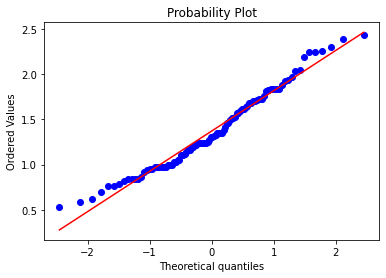

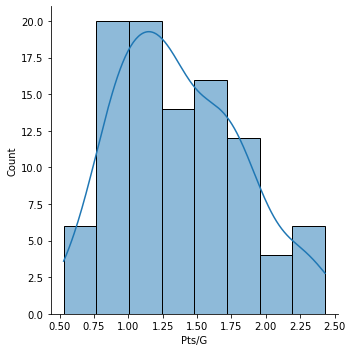

In [5]:
stats.probplot(df['Pts/G'], plot=plt)

sns.displot(df,x='Pts/G',kde=True);

#### Pruebas de normalidad

Para nuestro ejemplo usaremos la prueba de **Shapiro-Wilk**

**$H_{0}$** : los datos tienen una distribución normal.

**$H_{1}$** : los datos no tienen una distribución normal.

**$\alpha$=** 0.05.

In [6]:
stat, p = shapiro(df['Pts/G'])
print('stat=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('Probabilidad Gaussiana')
else:
    print('Probabilidad no Gaussiana')

stat=0.972, p-value=0.035
Probabilidad no Gaussiana


* **p-value** es menor que 0.05.

* Por lo tanto, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa.

## Ejercicio 2
Con el mismo dataset seleccione dos otros atributos del conjunto de datos. Calcule los **p-valores** y diga si rechazan la hipótesis nula cogiendo un $\alpha$ de 5%.

# Solución

1. ¿Existe alguna diferencia entre los puntos alcanzados por todos los equipos  de la liga Francesa e Inglesa?

### T-Test (Student T-Test)

La prueba T es un tipo de prueba muy utilizado en estadística inferencial. Esta prueba se suele utilizar en situaciones en las que necesitamos saber si existe una diferencia significativa entre las medias de dos grupos.

In [7]:
df_ITA = df.query('Country == "ITA"')['Pts']
df_ENG = df.query('Country == "ENG"')['Pts']

**$H_{0}$** :$\qquad$   $\mu(df\_ITA) = \mu(df\_ENG)$

**$H_{1}$** :$\qquad$  $\mu(df\_ITA)\neq\mu(df\_ENG)$

**$\alpha$=** 0.05.

In [8]:
t,p=stats.ttest_ind(df_ITA, df_ENG)
print('t = ',t)
print('p-value =',p)

t =  0.0
p-value = 1.0


* **p-value** es mayor que 0.05.

* Por lo tanto, no rechazamos la hipótesis nula y descartamos la hipótesis alternativa.

En la tabla siguiente podemos comprobar las media de los pumtos logrados  de la liga Italiana e Inglesa son iguales. 

In [27]:
df.groupby('Country')['Pts'].describe()[['mean']].iloc[[0,4]]


,mean
Country,
ENG,50.45
ITA,50.45


## Ejercicio 3
Continúe con el conjunto de datos adjunto y seleccione tres atributos del conjunto de datos. Calcule los **p-valores** y diga si rechaza la hipótesis nula cogiendo un alfa de 5%.

### Pruebas entre varios grupos con ANOVA

Digamos que queremos probar más de un diseño a la vez y compararlos todos para ver cuál es el mejor: Diseños A, B y C. Para comparar las medias de tres o más grupos, podemos utilizar una prueba ANOVA. Este método se puede utilizar primero para ver si hay alguna diferencia entre cualquiera de los grupos. En lugar de una prueba **t**, utiliza una prueba **F**. De nuevo, este método proporciona un valor **p**, que comparamos con un valor significativo que elegimos (normalmente 0,05).

# Solución

1. ¿Existe alguna diferencia entre las personas que asisten a un partido de la liga Inglesa, Espaañola e Italiana?

**$H_{0}$** :$\qquad$   $\mu(league\_ESP) = \mu(league\_ENG) = \mu(league\_ITA)$.

**$H_{1}$** :$\qquad$  Al menos una de las medias es diferente.

**$\alpha$=** 0.05.

In [15]:
league_ENG=df[df.Country=='ENG']
league_ESP=df[df.Country=='ESP']
league_ITA=df[df.Country=='ITA']

In [16]:
statistic,p=f_oneway(league_ENG.Attendance,league_ESP.Attendance,league_ITA.Attendance)
print('t = ',statistic)
print('p-value =',round(p,4))


t =  13.937579649411052
p-value = 0.0


* **p-value** es menor que 0.05.

* Por lo tanto, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa. Es decir, existe una diferencia significatic¡va entre el número de asistentes a los estadios de estas tres ligas.

En la tabla siguiente podemos comprobar que las media de los asistentes a los estadios de estas ligas son muy diferentes. 

In [17]:
df.groupby('Country')['Attendance'].describe()[['mean']].iloc[[0,1,3]]

,mean
Country,
ENG,39538.700000
ESP,22937.600000
GER,21025.055556


In [18]:
df_league=pd.concat([league_ENG,league_ESP,league_ITA],axis=0)

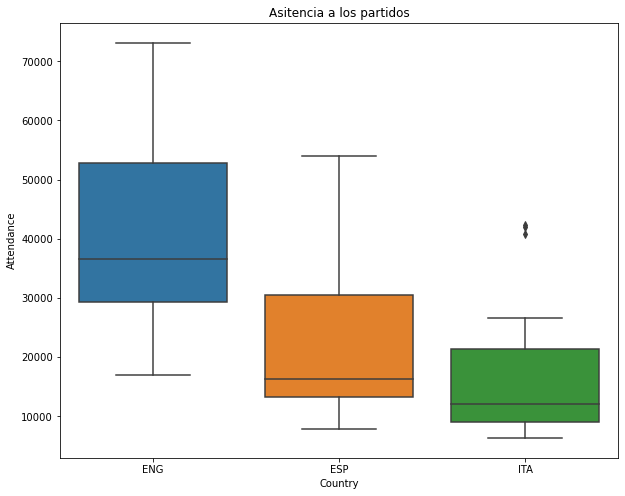

In [26]:
fig=plt.figure(figsize=(10,8))
sns.boxplot(data=df_league,y='Attendance',x='Country')
plt.title('Asitencia a los partidos')
plt.show()